In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
B = cv2.imread("target.png")
R = cv2.imread("input.png")

B = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
R = cv2.cvtColor(R, cv2.COLOR_BGR2RGB)

B = cv2.resize(B, (256, 384))
R = cv2.resize(R, (256, 384))

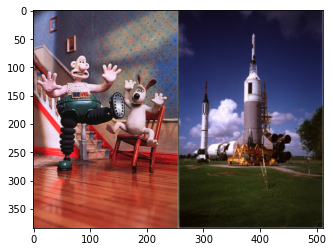

In [157]:
plt.imshow(np.concatenate((B, cv2.resize(R, (B.shape[1], B.shape[0]))), axis=1))

In [158]:
def calHistRGB(I):
    hr = np.zeros(2**8+5).astype(np.uint64)
    hg = np.zeros(2**8+5).astype(np.uint64)
    hb = np.zeros(2**8+5).astype(np.uint64)
    for r in range(I.shape[0]):
        for c in range(I.shape[1]):
            hr[I[r][c][0]] = hr[I[r][c][0]] + 1
            hg[I[r][c][1]] = hg[I[r][c][1]] + 1
            hb[I[r][c][2]] = hb[I[r][c][2]] + 1
    return hr, hg, hb

In [159]:
hrB, hgB, hbB = calHistRGB(B)
hrR, hgR, hbR = calHistRGB(R)

In [160]:
print(hrB, hgB, hbB)

[  0   0   2   2   3   5   8   6  16  15  30  56  98 178 224 233 256 253
 216 196 139 156 148 139 168 154 146 156 137 149 164 145 138 130 132 182
 145 156 167 183 162 168 149 140 157 152 148 154 164 167 186 203 203 215
 254 336 336 371 383 442 466 524 521 527 535 560 558 584 555 565 535 530
 538 526 533 541 494 524 489 447 451 479 415 433 417 383 411 372 392 417
 418 401 401 422 363 439 373 396 404 411 393 395 387 414 404 413 384 404
 392 422 451 419 478 470 470 523 528 441 443 487 527 457 478 504 446 520
 456 480 492 524 495 499 520 488 522 465 558 464 529 525 542 547 534 526
 532 521 537 567 541 540 546 528 544 589 576 574 591 596 625 659 620 663
 655 672 655 705 657 726 665 735 728 709 817 818 791 845 827 809 818 844
 831 826 862 754 722 654 686 652 627 690 602 615 567 571 551 503 464 488
 482 455 400 399 366 329 287 298 286 288 301 283 249 248 197 227 203 175
 184 177 177 185 188 208 202 211 213 214 190 215 217 242 205 219 229 232
 237 235 244 242 261 247 235 241 208 235 236 234 22

In [161]:
def calCDF(hr, hg, hb, A):
    cdf_r = np.zeros(2**8).astype(np.float16)
    cdf_g = np.zeros(2**8).astype(np.float16)
    cdf_b = np.zeros(2**8).astype(np.float16)
    for i in range(0, 2**8):
        cdf_r[i] = 1.0*hr[i]/A + (cdf_r[i-1] if i > 0 else 0.0)
        cdf_g[i] = 1.0*hg[i]/A + (cdf_g[i-1] if i > 0 else 0)
        cdf_b[i] = 1.0*hb[i]/A + (cdf_b[i-1] if i > 0 else 0)
    return cdf_r, cdf_g, cdf_b

In [162]:
cdfB = calCDF(hrB, hgB, hbB, B.shape[0]*B.shape[1])
cdfR = calCDF(hrR, hgR, hbR, R.shape[0]*R.shape[1])
print(cdfB[0][-1])

0.9995


[[  0   0   0   0   0   0   0   0   0   0   0   0   4   8  13  15  18  22
   29  37  48  57  63  69  74  79  84  90  96 101 107 112 117 122 127 131
  135 139 143 146 149 152 155 158 160 162 164 165 167 169 170 171 172 173
  174 175 176 177 177 178 178 179 180 180 181 181 182 182 183 183 184 184
  184 185 185 186 186 186 187 187 187 188 188 188 189 189 189 190 190 190
  191 191 192 192 192 193 193 194 194 194 195 195 196 196 196 197 197 198
  198 198 199 199 200 200 201 201 202 202 202 203 203 204 204 205 205 206
  206 207 207 208 208 209 209 209 210 211 211 212 213 213 214 214 215 216
  216 217 218 218 219 219 220 221 222 223 223 224 225 226 226 227 228 228
  228 229 229 230 230 231 231 231 232 232 232 233 233 233 234 234 234 234
  235 235 235 236 236 236 236 237 237 237 237 238 238 238 238 239 239 239
  239 239 240 240 240 240 241 241 241 241 241 242 242 242 242 243 243 243
  243 243 244 244 244 244 244 245 245 245 245 245 246 246 246 246 247 247
  247 248 248 248 249 249 250 250 250 

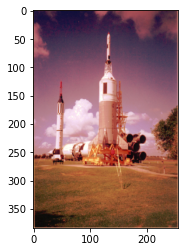

In [163]:
LUT = np.zeros((3, 2**8)).astype(np.uint64)

for k in range(3):
    j = 0
    for i in range(2**8):
        while( cdfB[k][j] < cdfR[k][i] and j < 255):
            j = j + 1
        LUT[k][i] = j
        
for r in range(R.shape[0]):
    for c in range(R.shape[1]):
        for k in range(R.shape[2]):
            R[r][c][k] = LUT[k][R[r][c][k]];
print(LUT)
plt.imshow(R)